In [1]:
import seq2loc
from seq2loc.datasets import Seq2locDataset


data_path = './data/hpa_data_resized_train.csv'

ds = Seq2locDataset(data_path)

In [3]:
data_dict = ds[[0,1,2,3]]

In [6]:
data_dict['sequence_source'].shape

torch.Size([4, 22, 805])

In [13]:
import torch.nn as nn

instance = getattr(nn, 'L1Loss')()


instance

L1Loss(
)

In [56]:
!cd ../OpenNMT-py; pip install -r requirements.txt; pip install -e ./


    100% |████████████████████████████████| 51kB 7.2MB/s 
    100% |████████████████████████████████| 829kB 1.5MB/s 
  Running setup.py bdist_wheel for torchtext ... done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /root/.cache/pip/wheels/bf/c9/a3/c538d90ef17cf7823fa51fc701a7a7a910a80f6a405bf15b1a
Successfully built torchtext future
  Found existing installation: torchtext 0.2.0
    Uninstalling torchtext-0.2.0:
      Successfully uninstalled torchtext-0.2.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Obtaining file:///root/projects/OpenNMT-py
  Running setup.py develop for OpenNMT-py
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import torch
from torch.autograd import Variable
import onmt


embedding = onmt.modules.Embeddings(word_vec_size = 512,
                 word_vocab_size = 10,
                 word_padding_idx = 9,
                 position_encoding=True)

for e in embedding.make_embedding.emb_luts:
    print(e)
# seq = Variable(torch.Tensor([[[0,0,0,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0,0,1]]]))

# embedding(Variable(torch.Tensor([[[1],[2], [9]], [[1], [2], [9]]]).long()))

# embedding(seq)


In [ ]:
from onmt.modules import TransformerEncoder, TransformerDecoder


# enc(torch.Tensor)
enc = TransformerEncoder(num_layers = 10, hidden_size = 512, dropout = 0.2, embeddings = embedding)
dec = TransformerDecoder(num_layers = 10, hidden_size = 512, attn_type = 'dot', copy_attn = False, dropout = 0.2, embeddings = embedding)

model = onmt.Models.NMTModel(enc, dec)



In [ ]:
seq_in = Variable(torch.Tensor([[[1],[2], [9]], [[1], [2], [9]]]).long())
seq_out = Variable(torch.Tensor([[[1],[2], [9]], [[1], [2], [9]], [[1], [2], [9]]]).long())
# seq_out = Variable(torch.Tensor([[1,2,9], [1,2,9]]).long())

seq_lens = Variable(torch.Tensor([2,1,0]).long())

print(seq_in.shape)
print(seq_out.shape)
print(seq_lens.shape)

In [ ]:
#for whatever reason in the code the last element of the target sequence is removed

a, b, c = model(seq_in, seq_out, seq_lens)

print(a)
print(b)
print(c)

In [ ]:
id_list = list()
for id in df_uniprot['GO id']:
    id_list = id_list + [id.split(';')]
    
u_ids = np.unique(np.hstack(id_list))
    

In [ ]:
10 % 10

In [ ]:
len(u_ids)

print(u_ids)

In [ ]:
from seq2loc.datasets import SequenceDataset, PaddedSequenceDataset, NewsgroupsDataset

ds = PaddedSequenceDataset(NewsgroupsDataset('./data/20_newsgroups/train.pickle'), GPU_id = 0, n_jobs = 16)



In [ ]:
import time

start = time.time()
a, b = ds[list(range(64))]
end = time.time()
print(end - start)

In [ ]:
ds[[0]]

In [ ]:
import glob

directories = glob.glob('./data/20_newsgroups')
    
for directory in directories:
    

with open('./20_newsgroups/comp.sys.mac.hardware/50418', 'r') as f:
    x = f.readlines()
    
for i, line in enumerate(x):
    if line[0:7] == 'Lines: ':
        '.'.join(x[i+1:])

In [ ]:
import glob
import os

directories = glob.glob('./data/20_newsgroups/*')

classes =  [os.path.basename(directory) for directory in directories]

In [ ]:
classes

In [ ]:
xml = ET.parse('./data/proteinatlas.xml')
root = xml.getroot()


In [ ]:
import pdb

for entry in root.findall('entry'):
    pdb.set_trace()
    print(entry)

In [ ]:
import tqdm
import pandas as pd

rows = list()

for entry in tqdm.tqdm(root.iter('entry')):
    
    ensg = hpa.filter_element(entry, 'identifier').attrib['id']
    
    for expression in entry.iter('cellExpression'):
        for data in expression.iter('data'):

            go_id = list()
            go_location = list()
            celllines = list()
            ensgs = ensg
            
            for loc in data.iter('location'): 
                go_id += [loc.attrib['GOId']]
                go_location += [loc.text.lower()]

            for cellline in data.iter('cellLine'):
                celllines += [cellline.text]

            if len(celllines) > 1:
                pdb.set_trace()
            elif len(celllines) == 1:
                celllines = celllines[0]
            else:
                continue
            
            rows += [[ensg, celllines, go_id, go_location]]
                
df = pd.DataFrame(rows, columns = ['ENSG', 'cellLine', 'GO id', 'GO location'])
ulocations, location_counts = np.unique(np.hstack(df['GO location']), return_counts = True)           

In [ ]:
df = pd.DataFrame(rows, columns = ['ENSG', 'cellLine', 'GO id', 'GO location'])
ulocations, location_counts = np.unique(np.hstack(df['GO location']), return_counts = True)     

In [ ]:
df = pd.read_csv('./data/rna_celline.tsv', sep='\t')

df_matrix = pd.DataFrame()

for i in tqdm.tqdm(range(len(df))):
    df_matrix.loc[df.loc[i, 'Gene'], df.loc[i, 'Sample']] = df.loc[i, 'Value']
    
df_matrix.to_csv('./data/rna_cellline_matrix.csv')

In [ ]:
df_matrix['HeLa'][np.where(df_matrix['A549'] == 0)[0]]

In [ ]:
import sklearn
import numpy as np
from sklearn.manifold import TSNE

x = df_matrix.as_matrix()
x_embedded = TSNE(n_components=2).fit_transform(x)

In [ ]:
plt.scatter(x_embedded[:,0], x_embedded[:,1])

In [ ]:
import torch
import torch.optim as optim
from torch.autograd import Variable

w = Variable(torch.randn(3, 5), requires_grad=True)
x = torch.nn.Parameter(torch.Tensor(torch.randn(5)))

optimizer = optim.SGD([w], lr=0.01)

for i in range(10):
    optimizer.zero_grad()
    y = torch.mv(w, x) 
    
    err = torch.pow(torch.norm(y - torch.mv(w, x)), 2)
    err.backward()
    optimizer.step()
    print(err)

In [26]:
import torch
import torch.optim

In [30]:
?torch.optim.Adam

Init signature: torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
Docstring:     
Implements Adam algorithm.

It has been proposed in `Adam: A Method for Stochastic Optimization`_.

Arguments:
    params (iterable): iterable of parameters to optimize or dicts defining
        parameter groups
    lr (float, optional): learning rate (default: 1e-3)
    betas (Tuple[float, float], optional): coefficients used for computing
        running averages of gradient and its square (default: (0.9, 0.999))
    eps (float, optional): term added to the denominator to improve
        numerical stability (default: 1e-8)
    weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
    amsgrad (boolean, optional): whether to use the AMSGrad variant of this
        algorithm from the paper `On the Convergence of Adam and Beyond`_

.. _Adam\: A Method for Stochastic Optimization:
    https://arxiv.org/abs/1412.6980
.. _On the Convergence of Ada

In [3]:
import seq2loc
import seq2loc.models.tiramisu.tiramisu_seq2loc as tiramisu

In [4]:
model = tiramisu.FCDenseNet()

In [5]:
model

FCDenseNet(
  (firstconv): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (denseBlocksDown): ModuleList(
    (0): DenseBlock(
      (layers): ModuleList(
        (0): DenseLayer(
          (norm): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
          (relu): ReLU(inplace)
          (conv): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (drop): Dropout2d(p=0.2)
        )
        (1): DenseLayer(
          (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
          (relu): ReLU(inplace)
          (conv): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (drop): Dropout2d(p=0.2)
        )
        (2): DenseLayer(
          (norm): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True)
          (relu): ReLU(inplace)
          (conv): Conv2d(80, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (drop): Dropout2d(p=0.2)
        )
        (3): DenseLayer(
          (norm): BatchNorm

In [7]:
import seq2loc
from seq2loc.datasets import Seq2LocDataset
import seq2loc.utils as utils

ds = Seq2LocDataset('./data/hpa_data_resized_train.csv', 
                    GPU_id = None)

batch_size = 64
epoch_inds = utils.get_epoch_inds(len(ds), batch_size)

In [44]:
image[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 0, 0],
       [0, 0, 0, ..., 6, 6, 0],
       [0, 0, 0, ..., 6, 0, 0]], dtype=uint8)

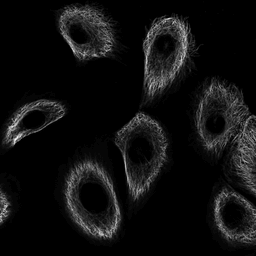

In [55]:
from IPython.core.display import display
import PIL.Image
import numpy as np


image = ds[[8]]['image_source'].data.numpy()
image = image[0,0]
image /= np.max(image)
image *= 255

image = image.astype(np.uint8)

image = np.squeeze(image)

display(PIL.Image.fromarray(image))

In [52]:
image = ds[[8]]['image_source'].data.numpy()
image.shape

(1, 2, 256, 256)

In [6]:
ds[[0]]

NameError: name 'ds' is not defined